# BME-230B Spring 2019 HW 4 Question 
James Casaletto, Andrew Davidson, Yuanqing Xue, Jim Zheng

## <span style="color:red">TODO</span>
* 4.a does not ask for graph. its useful for debugging
* 4.b
* remove louvain debug cell
* add ref: URLS
* is this correct? did not fix the warning/errors from sc.tl.louvain and sc.tl.umap
    - see  euclid_bbknn.py _update_adata(self, l=None):
    ```
    n = self._neighbors_within_batch
    if l:
        n = self._numBatches * l

    self._adata.uns['neighbors']['params']['n_neighbors']=n
    ```

## 4.a. [10 pts] 
Turn in code that can compute a bb-l-k-NNG from a given bb-k-NNG. In addition to the input bb-k-NNG, the method should take in a parameter specifying the number of subsampled graphs that should be returned. Each of the returned subsampled graphs should represent a distinct sub-sampled bb-l-k-NNG from the given input graph. Fill in the l_k_bbknn method in euclid_bknn.py. You can set the l parameter accordingly. NOTE: in order to run this function successfully you will have to run the bbknn() method first, and then run the l_k_bbknn method. Consult example usage within euclid_bbknn.py.


In [1]:
from euclid_bbknn import bbknn_graph
# import gseapy as gp
import matplotlib.pyplot as plt
# import numpy as np
# import os


#import pandas as pd
#import scanpy.api as sc
import scanpy as sc
print("scanpy.__version__:{}".format(sc.__version__))

scanpy.__version__:1.4.1


In [2]:
%%time
anndata = sc.read("PBMC.merged.h5ad")

CPU times: user 1.55 s, sys: 147 ms, total: 1.7 s
Wall time: 1.12 s


In [3]:
%%time
# run our implementation of nearest neighboors and update anndata
bb6nn = bbknn_graph(anndata, neighbors_within_batch=6, runPCA=True, pcs=50)

CPU times: user 3min 25s, sys: 2 s, total: 3min 27s
Wall time: 3min 21s


In [4]:
%%time
sc.tl.louvain(anndata,
                  flavor='igraph', 
                  directed=False, 
                  use_weights=True)

CPU times: user 2.1 s, sys: 86 ms, total: 2.19 s
Wall time: 1.04 s


In [5]:
# save the bb6nn results. we will need them for 4.b
bb6nnConnectivities = anndata.uns['neighbors']['connectivities']
bb6nnDistances      = anndata.uns['neighbors']['distances']
bb6nnLouvain        = anndata.obs['louvain']

In [6]:
# debug
bb6nnLouvain.head()

index
data_3p-AAACCTGAGCATCATC-0     6
data_3p-AAACCTGAGCTAGTGG-0     8
data_3p-AAACCTGCACATTAGC-0     0
data_3p-AAACCTGCACTGTTAG-0    15
data_3p-AAACCTGCATAGTAAG-0     9
Name: louvain, dtype: category
Categories (22, object): [0, 1, 2, 3, ..., 18, 19, 20, 21]

In [7]:
# how to you print csr_matrix ?
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix
print(type(bb6nnConnectivities))
print(bb6nnConnectivities.shape)
print(type(bb6nnConnectivities[10:15, 0:5]))
print(bb6nnConnectivities[0:5, 0:5])

<class 'scipy.sparse.csr.csr_matrix'>
(15476, 15476)
<class 'scipy.sparse.csr.csr_matrix'>



In [8]:
## <span style="color:red">AEDWIP</span>

In [9]:
%%time
bb6nn.l_k_bbknn(l=3)

CPU times: user 10.2 s, sys: 262 ms, total: 10.5 s
Wall time: 3.89 s


In [10]:
%%time
sc.tl.louvain(anndata,
                  flavor='igraph', 
                  directed=False, 
                  use_weights=True)

InternalError: Error at community.c:2677: weights must be positive, Invalid value

In [11]:
# save the bb3-6nn results. we will need them for 4.b
bb3_6nnConnectivities = anndata.uns['neighbors']['connectivities']
bb3_6nnDistances      = anndata.uns['neighbors']['distances']
bb3_6nnLouvain        = anndata.obs['louvain']

In [12]:
%%time
sc.tl.umap(anndata)

/Users/andrewdavidson/anaconda3/envs/BME-230B-hw2/lib/python3.7/site-packages/scanpy/neighbors/umap/umap_.py:870: RuntimeWarning: invalid value encountered in sqrt
  D = scipy.sparse.spdiags(1.0 / np.sqrt(diag_data), 0, graph.shape[0],
/Users/andrewdavidson/anaconda3/envs/BME-230B-hw2/lib/python3.7/site-packages/scanpy/neighbors/umap/umap_.py:870: RuntimeWarning: divide by zero encountered in true_divide
  D = scipy.sparse.spdiags(1.0 / np.sqrt(diag_data), 0, graph.shape[0],


CPU times: user 9.07 s, sys: 91.3 ms, total: 9.16 s
Wall time: 6.83 s


<Figure size 720x720 with 0 Axes>

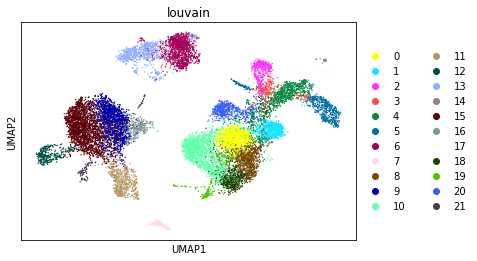

In [13]:
plt.figure(figsize=(10,10))
sc.pl.umap(anndata, color=["louvain"])

## 4.b. [10 pts] 
Turn in a bar plot of the Adjusted Rand Index (ARI) for Louvain clusters obtained from 10 independently subsampled bb-3-6-NNGs compared to the Louvain clusters obtained on the original bb-6-NNGs. Also report the average and standard deviations of the ARI. Based on these results, would you conclude these clusters are robust? Justify your answer. Hint: check if your ARI is significantly better than chance.


no l
l:3
